In [1]:
import cv2
from src.utils.func import (crop_center, read_image_as_numpyimage, get_corners,)
from src.utils.playfield_finder import PlayfieldFinder
import numpy as np
from src.utils.plotting import display_img, plot_on_image
import src.config
from src.utils.metrics import iou
from src.utils.intersections import compute_intersections
from src.utils.annotations import transform_annotation
from pathlib import Path
import pandas as pd
from src.utils.annotations import PolygonAnnotation
import matplotlib.pyplot as plt

In [ ]:
root = Path('pics')

for picname in root.glob('*.png'):
    pic = read_image_as_numpyimage(picname, 'rgb') 

    hsv = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV)

    # Szeroki zakres zieleni (OpenCV: H 0-179, S 0-255, V 0-255)
    # Zielony zwykle ~35-85, tu szerzej:
    lower_green = np.array([25, 40, 40])   # H, S, V
    upper_green = np.array([95, 255, 255])

    # Binaryzacja (maska 0/255)
    mask = cv2.inRange(hsv, lower_green, upper_green)

    cv2.imwrite(f'tests/binaryzacja_test/{picname.stem}_mask.png', mask)


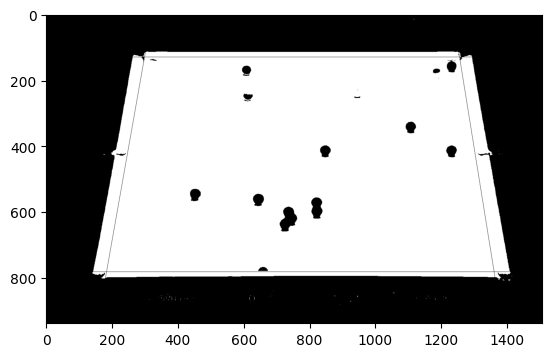